In [1]:
import numpy as np
import pandas as pd

In [2]:
#download from code_poysian/archive/candidate_link_data.ipynb
df_ind = pd.read_csv('../../data/a1/indicator.csv')

In [3]:
df_ind

,province_name,province_lat,province_lon,English_name,AREA
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456


In [4]:
df_J1V_ace = pd.read_csv("../../data/FIRM-NASA-fire-alert-data/DL_FIRE_J1V-C2_591395/fire_archive_J1V-C2_591395.csv")

In [5]:
df_J1V_ace

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,16.29705,103.78316,339.22,0.50,0.41,2018-04-01,603,N20,VIIRS,n,2,300.99,4.94,D,0
1,16.21809,103.21005,335.21,0.53,0.42,2018-04-01,603,N20,VIIRS,n,2,302.51,3.10,D,0
2,16.18192,103.56709,333.21,0.51,0.41,2018-04-01,603,N20,VIIRS,n,2,296.31,3.59,D,0
3,15.88159,102.03447,336.77,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.09,3.66,D,0
4,15.88229,102.03834,341.89,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.13,3.66,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007832,14.04759,99.00271,299.40,0.39,0.36,2024-11-30,1853,N20,VIIRS,n,2,288.80,0.25,N,0
1007833,13.52011,100.78498,314.02,0.40,0.37,2024-11-30,1853,N20,VIIRS,n,2,292.78,1.12,N,0
1007834,13.23041,101.16319,301.00,0.41,0.37,2024-11-30,1854,N20,VIIRS,n,2,290.67,0.51,N,0
1007835,12.50110,102.40980,301.61,0.46,0.39,2024-11-30,1854,N20,VIIRS,n,2,290.15,0.49,N,0


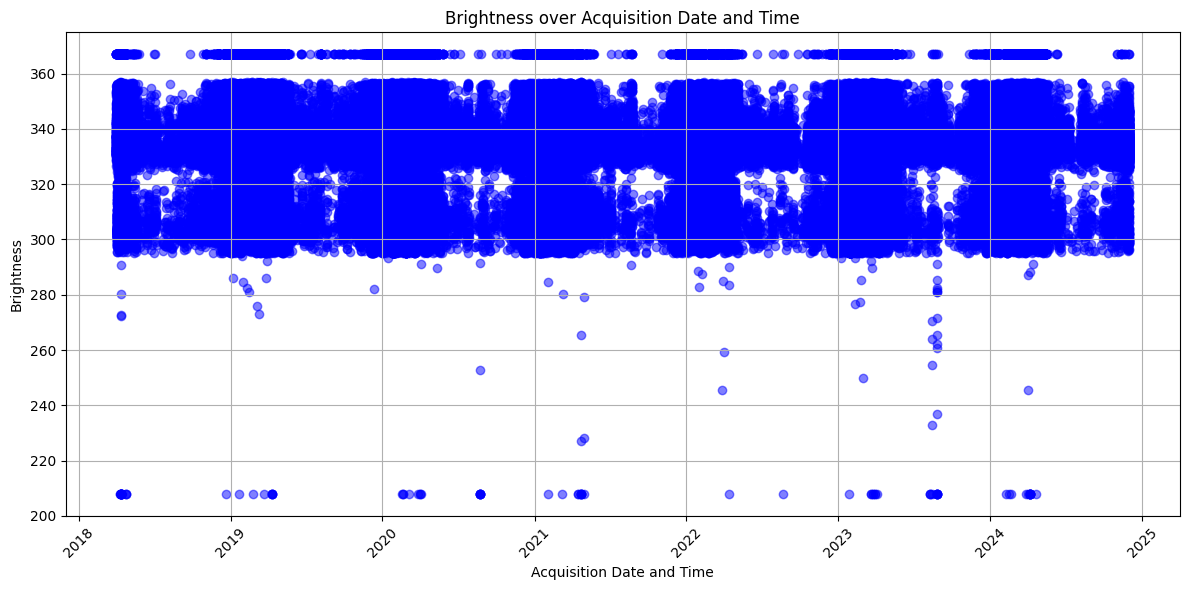

In [6]:
import matplotlib.pyplot as plt

# 1. Make sure acq_time is integer
df_J1V_ace['acq_time'] = df_J1V_ace['acq_time'].astype(int)

# 2. Extract hour and minute
df_J1V_ace['acq_hour'] = df_J1V_ace['acq_time'] // 100
df_J1V_ace['acq_minute'] = df_J1V_ace['acq_time'] % 100

# 3. Build the datetime
df_J1V_ace['acq_datetime'] = pd.to_datetime(
    df_J1V_ace['acq_date'].astype(str)
) + pd.to_timedelta(
    df_J1V_ace['acq_hour'], unit='h'
) + pd.to_timedelta(
    df_J1V_ace['acq_minute'], unit='m'
)

# 4. Plot
plt.figure(figsize=(12, 6))
plt.scatter(df_J1V_ace['acq_datetime'], df_J1V_ace['brightness'], c='blue', alpha=0.5)
plt.title('Brightness over Acquisition Date and Time')
plt.xlabel('Acquisition Date and Time')
plt.ylabel('Brightness')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
df_J1V_ace.drop(columns=['acq_hour', 'acq_minute'], inplace=True)
df_J1V_ace

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime
0,16.29705,103.78316,339.22,0.50,0.41,2018-04-01,603,N20,VIIRS,n,2,300.99,4.94,D,0,2018-04-01 06:03:00
1,16.21809,103.21005,335.21,0.53,0.42,2018-04-01,603,N20,VIIRS,n,2,302.51,3.10,D,0,2018-04-01 06:03:00
2,16.18192,103.56709,333.21,0.51,0.41,2018-04-01,603,N20,VIIRS,n,2,296.31,3.59,D,0,2018-04-01 06:03:00
3,15.88159,102.03447,336.77,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.09,3.66,D,0,2018-04-01 06:03:00
4,15.88229,102.03834,341.89,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.13,3.66,D,0,2018-04-01 06:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007832,14.04759,99.00271,299.40,0.39,0.36,2024-11-30,1853,N20,VIIRS,n,2,288.80,0.25,N,0,2024-11-30 18:53:00
1007833,13.52011,100.78498,314.02,0.40,0.37,2024-11-30,1853,N20,VIIRS,n,2,292.78,1.12,N,0,2024-11-30 18:53:00
1007834,13.23041,101.16319,301.00,0.41,0.37,2024-11-30,1854,N20,VIIRS,n,2,290.67,0.51,N,0,2024-11-30 18:54:00
1007835,12.50110,102.40980,301.61,0.46,0.39,2024-11-30,1854,N20,VIIRS,n,2,290.15,0.49,N,0,2024-11-30 18:54:00


In [8]:
df_ind

,province_name,province_lat,province_lon,English_name,AREA
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456


In [9]:
df_ind["R"] = np.sqrt(df_ind["AREA"] / np.pi)
df_ind

,province_name,province_lat,province_lon,English_name,AREA,R
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336,22.364772
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388,78.685560
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446,58.120297
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605,37.867015
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103,84.016974
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456,13.207646


In [10]:
#https://undergroundmathematics.org/trigonometry-compound-angles/the-great-circle-distance
#https://data.opendevelopmentmekong.net/dataset/thailand-provincial-boundaries
#https://www.mapsofworld.com/lat_long/thailand-lat-long.html
#https://data.humdata.org/dataset/cod-ab-tha
import math

def distancesphere(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

In [11]:
# Get Bangkok coordinates
bangkok_lat = df_ind.loc[df_ind['English_name'] == 'Bangkok Metropolis', 'province_lat'].iloc[0]
bangkok_lon = df_ind.loc[df_ind['English_name'] == 'Bangkok Metropolis', 'province_lon'].iloc[0]

# Then compute distance from Bangkok to all provinces
df_J1V_ace['distance_km'] = df_J1V_ace.apply(lambda row: distancesphere(bangkok_lat, bangkok_lon, row['latitude'], row['longitude']), axis=1)
df_J1V_ace

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,distance_km
0,16.29705,103.78316,339.22,0.50,0.41,2018-04-01,603,N20,VIIRS,n,2,300.99,4.94,D,0,2018-04-01 06:03:00,451.772073
1,16.21809,103.21005,335.21,0.53,0.42,2018-04-01,603,N20,VIIRS,n,2,302.51,3.10,D,0,2018-04-01 06:03:00,399.874313
2,16.18192,103.56709,333.21,0.51,0.41,2018-04-01,603,N20,VIIRS,n,2,296.31,3.59,D,0,2018-04-01 06:03:00,425.798194
3,15.88159,102.03447,336.77,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.09,3.66,D,0,2018-04-01 06:03:00,289.326774
4,15.88229,102.03834,341.89,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.13,3.66,D,0,2018-04-01 06:03:00,289.624646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007832,14.04759,99.00271,299.40,0.39,0.36,2024-11-30,1853,N20,VIIRS,n,2,288.80,0.25,N,0,2024-11-30 18:53:00,168.030957
1007833,13.52011,100.78498,314.02,0.40,0.37,2024-11-30,1853,N20,VIIRS,n,2,292.78,1.12,N,0,2024-11-30 18:53:00,36.448443
1007834,13.23041,101.16319,301.00,0.41,0.37,2024-11-30,1854,N20,VIIRS,n,2,290.67,0.51,N,0,2024-11-30 18:54:00,88.517411
1007835,12.50110,102.40980,301.61,0.46,0.39,2024-11-30,1854,N20,VIIRS,n,2,290.15,0.49,N,0,2024-11-30 18:54:00,245.576639


In [12]:
radius = df_ind.loc[df_ind['English_name'] == 'Bangkok Metropolis', 'R'].iloc[0]
bkk_map = df_J1V_ace[df_J1V_ace['distance_km'] <= radius*2].reset_index(drop=True)
print(radius)
print(bkk_map[['latitude', 'longitude', 'distance_km']])

22.364772102182094
      latitude  longitude  distance_km
0     14.06136  100.42788    38.507357
1     13.83529  100.23379    33.551298
2     13.87908  100.35175    25.081270
3     13.99993  100.30132    38.646243
4     14.02849  100.57300    33.838438
...        ...        ...          ...
4173  14.07704  100.64485    40.951636
4174  14.07771  100.64893    41.164273
4175  13.70230  100.61863    10.598307
4176  13.76492  100.90894    41.767406
4177  13.52011  100.78498    36.448443

[4178 rows x 3 columns]


In [13]:
print(bkk_map.head())

   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  14.06136  100.42788      336.18  0.64   0.72  2018-04-02       725   
1  13.83529  100.23379      334.80  0.59   0.53  2018-04-03       706   
2  13.87908  100.35175      334.48  0.60   0.53  2018-04-03       706   
3  13.99993  100.30132      331.71  0.60   0.53  2018-04-03       706   
4  14.02849  100.57300      333.19  0.48   0.40  2018-04-04       647   

  satellite instrument confidence  version  bright_t31   frp daynight  type  \
0       N20      VIIRS          n        2      287.04  5.83        D     0   
1       N20      VIIRS          n        2      292.14  4.35        D     0   
2       N20      VIIRS          n        2      293.33  4.22        D     0   
3       N20      VIIRS          n        2      292.33  7.84        D     0   
4       N20      VIIRS          n        2      295.92  3.62        D     0   

         acq_datetime  distance_km  
0 2018-04-02 07:25:00    38.507357  
1 2018-04-03

In [14]:
bkk_map.to_csv("../../data/a1/bkk_firemap.csv", index=False)